# Summer 2022 Data Science Intern Challenge
### Quan Phan

Average order value is calculated by divide the total sales by the numbers of order. If the AOV is significantly higher than expected, then it could be that the sales is extremely skewed to the right. We examine the data to examine whether this is correct.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


First, we re-calculate the AOV.

In [16]:
df['order_amount'].sum() / df.shape[0]

3145.128

The AOV is correct. Now, let's see if the sales is actually skewed to the right.

In [11]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [14]:
df['order_amount'].quantile(np.arange(1, 21) / 20)

0.05       122.0
0.10       133.0
0.15       145.0
0.20       156.0
0.25       163.0
0.30       176.0
0.35       193.0
0.40       236.0
0.45       264.0
0.50       284.0
0.55       306.0
0.60       322.0
0.65       342.0
0.70       356.0
0.75       390.0
0.80       444.0
0.85       483.0
0.90       531.0
0.95       640.0
1.00    704000.0
Name: order_amount, dtype: float64

There is proof that sales is skewed to the right! The maximum value(s) is extremely higher than the rest of the data. Let's visualize this with a histogram to see the problem better.

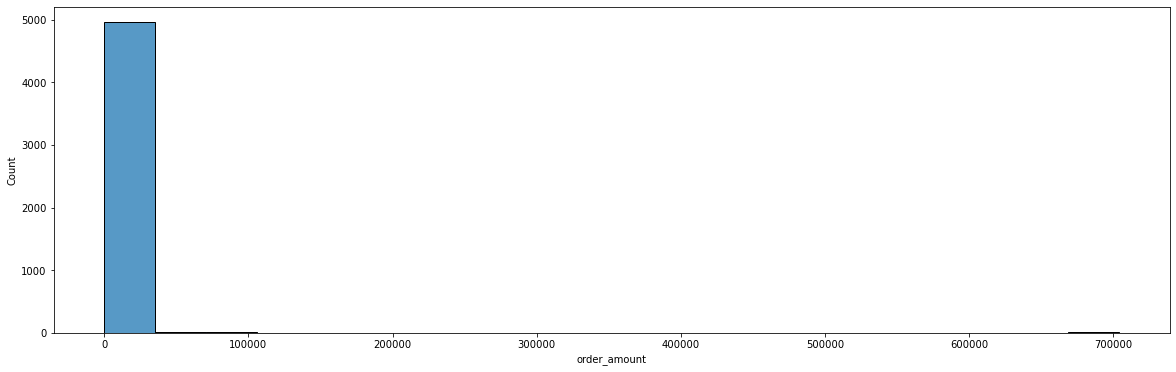

In [15]:
plt.figure(figsize = (20, 6))
sns.histplot(data = df, x = 'order_amount', bins = 20)
plt.show()

Most of the data lies in the first bin of the histogram, with only a few in the second and the last bins.

Now, we might want to examine the dramatically high sales numbers to see why they are so high. We look at any sales that are higher than the 98th percentile.

In [26]:
percentile_98_sales = df['order_amount'].quantile(0.98)
percent_98_sales_df = df.loc[df['order_amount'] > percentile_98_sales]
percent_98_sales_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35


While there are orders with multiple items (e.g 2000 items), which explains the high order amount, there are orders where an item costs more than expected. We calculate and visualize the amount paid per item to examine this problem.

In [31]:
percent_98_sales_df['amount_per_item'] = percent_98_sales_df['order_amount'] // percent_98_sales_df['total_items']
percent_98_sales_df.head()

C:\Users\hoang\AppData\Local\Temp/ipykernel_18200/1461896320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_98_sales_df['amount_per_item'] = percent_98_sales_df['order_amount'] // percent_98_sales_df['total_items']


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725


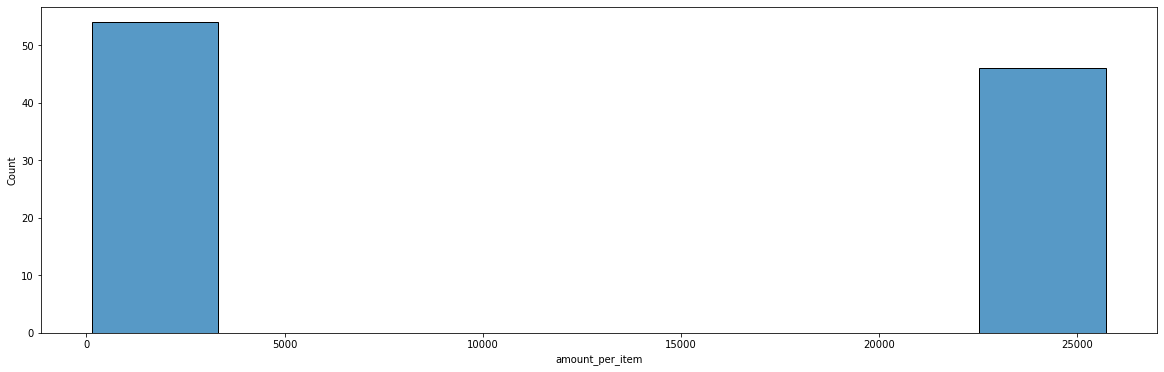

In [32]:
plt.figure(figsize = (20, 6))
sns.histplot(data = percent_98_sales_df, x = 'amount_per_item')
plt.show()

Well, unless there are sneaker stores with shoes at the price of $25,000, we might need to double check the validity of the data.

Anyway, we can see that the AOV is not a representative of __what a typical customer would spend for an sneaker order through Shopify__. To estimate this, we can use the Median Order Value, as median is the best alternative to average whenver there are extreme outliers. The MOV for this dataset is...

In [17]:
df['order_amount'].quantile(0.5)

284.0

...$284.